# Mental Health Analysis
### Python for Data Science Minor Project



#### Data Preprocessing

In [5]:
# Data manipulation
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis tools
from scipy import stats
from scipy.stats import shapiro, chi2_contingency, ttest_ind, mannwhitneyu
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [6]:
# Load data
df = pd.read_csv('student_depression_dataset.csv') 
print(df.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [7]:
df.columns


Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [8]:
# Clean column names:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('?', '', regex=False)
df.columns = df.columns.str.rstrip('_')

In [9]:
df.columns


Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic_Pressure',
       'Work_Pressure', 'CGPA', 'Study_Satisfaction', 'Job_Satisfaction',
       'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Have_you_ever_had_suicidal_thoughts', 'Work/Study_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'Depression'],
      dtype='object')

In [10]:
# Convert to numeric 
num_cols = ['Age', 'CGPA', 'Academic_Pressure', 'Work/Study_Hours', 'Financial_Stress']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')


In [11]:
# Check the cleaned column names
print(df.columns)


Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic_Pressure',
       'Work_Pressure', 'CGPA', 'Study_Satisfaction', 'Job_Satisfaction',
       'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Have_you_ever_had_suicidal_thoughts', 'Work/Study_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'Depression'],
      dtype='object')


In [14]:

df['Depression'] = df['Depression'].astype(str).str.strip().str.lower()
df['Depression'] = df['Depression'].replace({'yes': 'Yes', 'no': 'No', '1': 'Yes', '0': 'No'})

df['Have_you_ever_had_suicidal_thoughts'] = df['Have_you_ever_had_suicidal_thoughts'].astype(str).str.strip().str.lower()
df['Have_you_ever_had_suicidal_thoughts'] = df['Have_you_ever_had_suicidal_thoughts'].replace({'yes': 1, 'no': 0})


C:\Users\Asus\AppData\Local\Temp\ipykernel_14940\1368708822.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Have_you_ever_had_suicidal_thoughts'] = df['Have_you_ever_had_suicidal_thoughts'].replace({'yes': 1, 'no': 0})


In [21]:
df.dropna(inplace=True)


#### objective

                Age          CGPA  Academic_Pressure  Work/Study_Hours
count  27898.000000  27898.000000       27898.000000      27898.000000
mean      25.822174      7.656160           3.141336          7.156570
std        4.905651      1.470708           1.381462          3.707598
min       18.000000      0.000000           0.000000          0.000000
25%       21.000000      6.290000           2.000000          4.000000
50%       25.000000      7.770000           3.000000          8.000000
75%       30.000000      8.920000           4.000000         10.000000
max       59.000000     10.000000           5.000000         12.000000


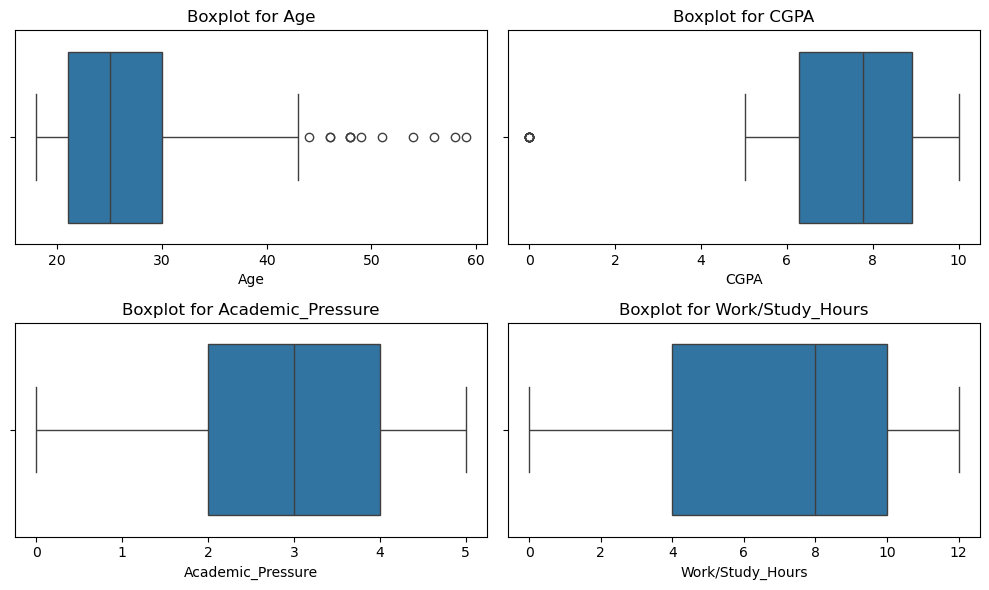

In [24]:
# Summary statistics 
numerical_columns = ['Age', 'CGPA', 'Academic_Pressure', 'Work/Study_Hours']
summary_stats = df[numerical_columns].describe()
print(summary_stats)

# Plot Boxplots for outlier detection
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()


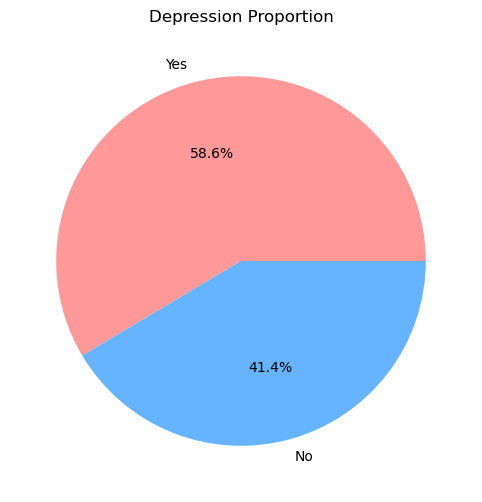

In [30]:
plt.figure(figsize=(8, 6))
depression_counts = df['Depression'].value_counts()
plt.pie(depression_counts, labels=depression_counts.index, autopct='%1.1f%%', colors=['#FF9999','#66B3FF'])
plt.title('Depression Proportion')
plt.show()


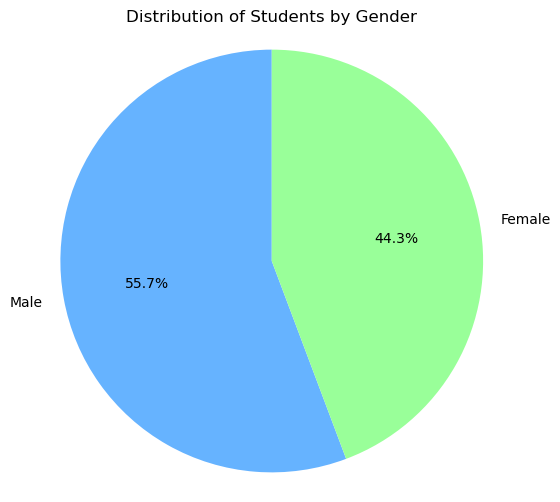

In [54]:
# Gender distribution using pie chart
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=["#66b3ff", "#99ff99"])
plt.title('Distribution of Students by Gender')
plt.axis('equal')
plt.show()


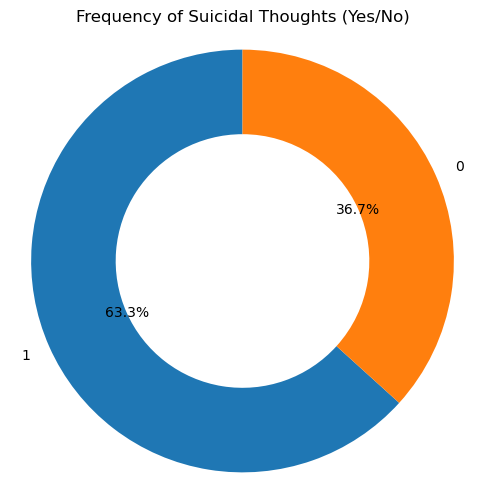

In [56]:
# Frequency of suicidal thoughts (Yes/No) using donut chart
suicidal_thoughts_counts = df['Have_you_ever_had_suicidal_thoughts'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(suicidal_thoughts_counts, labels=suicidal_thoughts_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Frequency of Suicidal Thoughts (Yes/No)')
plt.axis('equal')
plt.show()


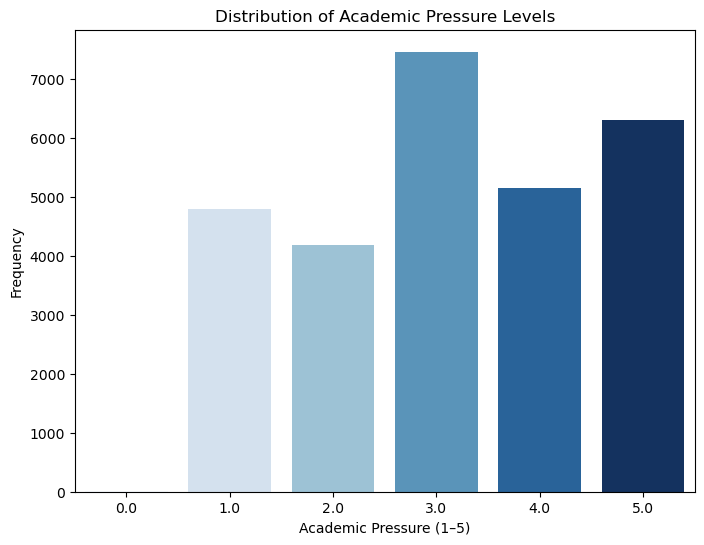

In [58]:
#Ditribution of academic pressure
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Academic_Pressure', hue='Academic_Pressure', palette='Blues', legend=False)
plt.title('Distribution of Academic Pressure Levels')
plt.xlabel('Academic Pressure (1–5)')
plt.ylabel('Frequency')
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_22408\4146935911.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sleep_Duration_Categorized', palette='Purples', order=sleep_categories)


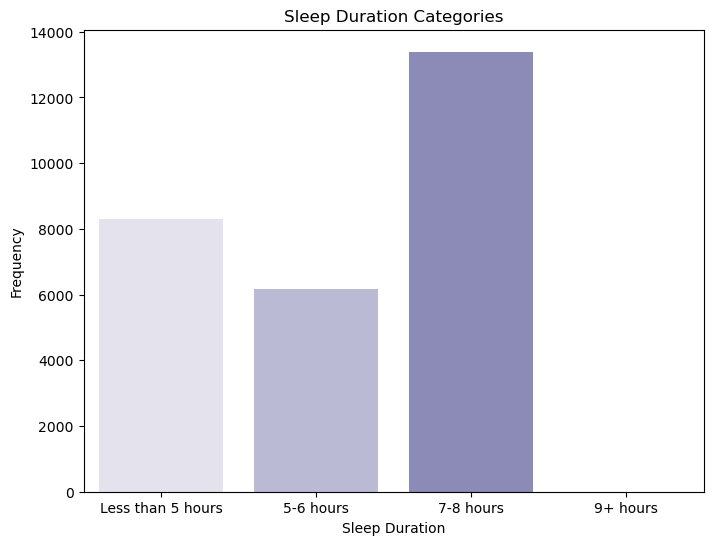

In [60]:
import numpy as np
import re

#Convert 'Sleep_Duration' into integer hours
def convert_sleep_to_hours(value):
    if isinstance(value, str):
        # Match numbers like "7-8 hours"
        match = re.findall(r'\d+', value)
        if len(match) == 2:
            return (int(match[0]) + int(match[1])) / 2  # average
        elif len(match) == 1:
            return int(match[0])
    return np.nan  # if nothing matches

df['Sleep_Duration_Hours'] = df['Sleep_Duration'].apply(convert_sleep_to_hours)

# make into diff categories
sleep_categories = ['Less than 5 hours', '5-6 hours', '7-8 hours', '9+ hours']
bins = [0, 5, 6, 9, 24]

df['Sleep_Duration_Categorized'] = pd.cut(df['Sleep_Duration_Hours'], bins=bins, labels=sleep_categories)

#graph
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sleep_Duration_Categorized', palette='Purples', order=sleep_categories)
plt.title('Sleep Duration Categories')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.show()


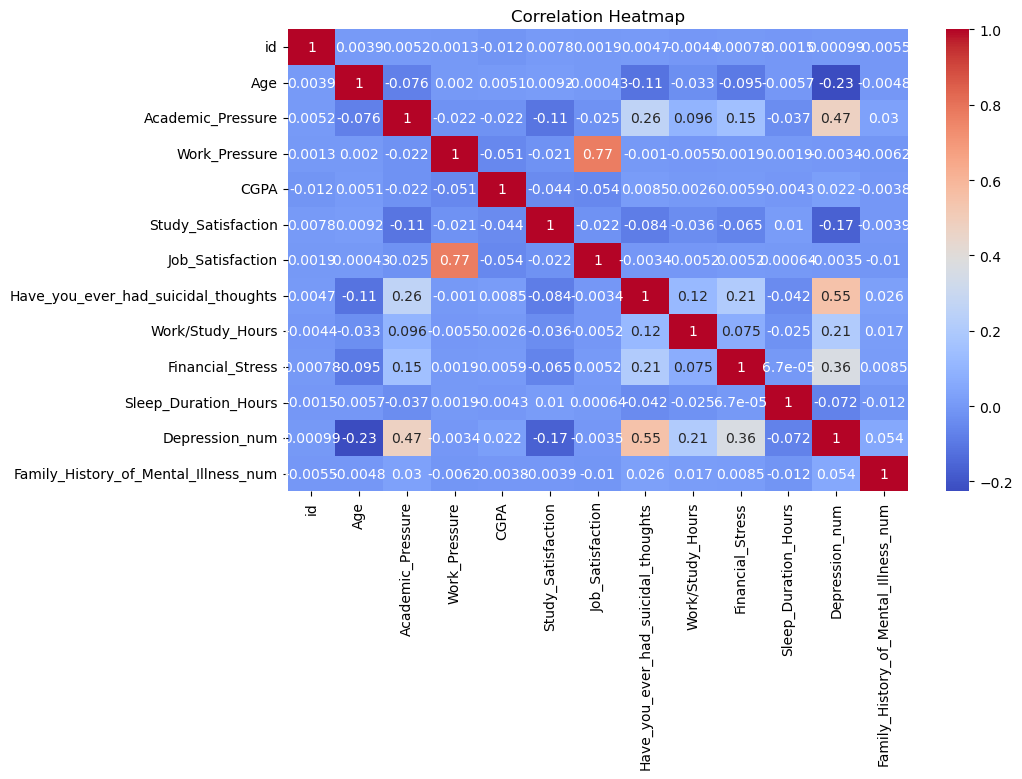

In [76]:
#corelation hetmap
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Chi-squared test result: p-value = 2.906453300023054e-265


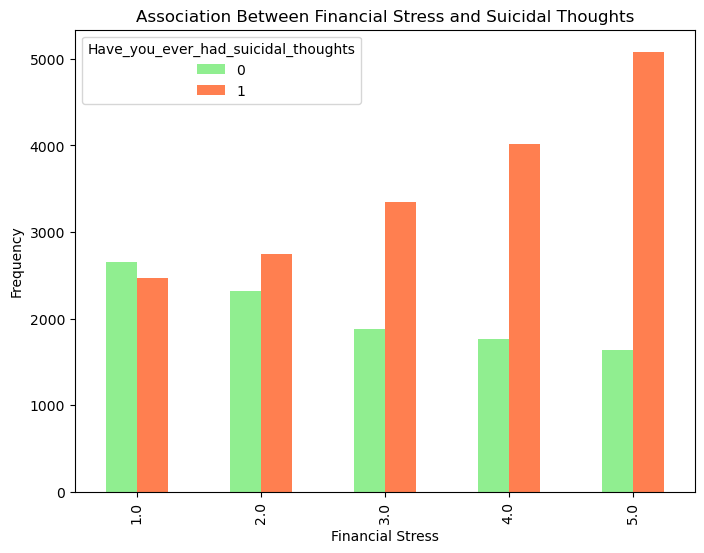

In [66]:
# Chi-squared test between Financial Stress and Suicidal Thoughts
contingency_table_stress_suicidal = pd.crosstab(df['Financial_Stress'], df['Have_you_ever_had_suicidal_thoughts'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_stress_suicidal)
print(f'Chi-squared test result: p-value = {p}')

# bar chart
contingency_table_stress_suicidal.plot(kind='bar', figsize=(8, 6), color=['lightgreen', 'coral'])
plt.title('Association Between Financial Stress and Suicidal Thoughts')
plt.xlabel('Financial Stress')
plt.ylabel('Frequency')
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27898.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test result: p-value = 1.8294842929154799e-69


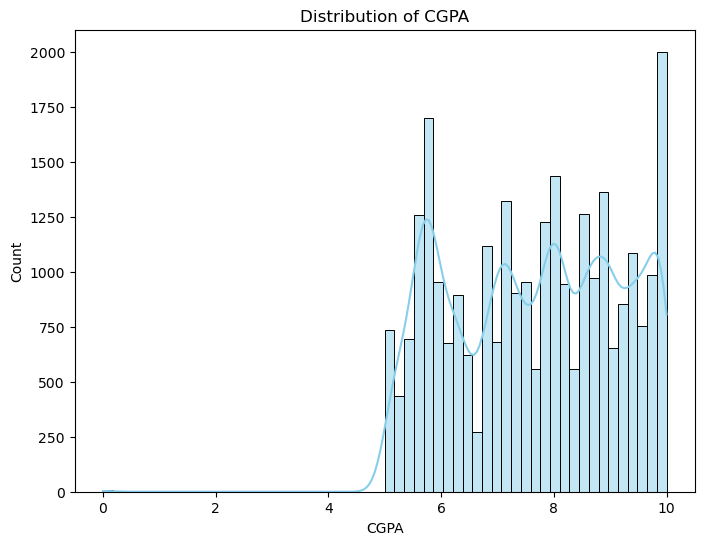

In [70]:
# Shapiro-Wilk test for normality
from scipy.stats import shapiro
import numpy as np
import scipy.stats as stats

# Perform Shapiro-Wilk test
stat, p_value = shapiro(df['CGPA'].dropna())
print(f'Shapiro-Wilk test result: p-value = {p_value}')


# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['CGPA'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of CGPA')
plt.show()
